<a href="https://colab.research.google.com/github/chaimamezgar/CentreDeFormationsANGULAR/blob/master/Face_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

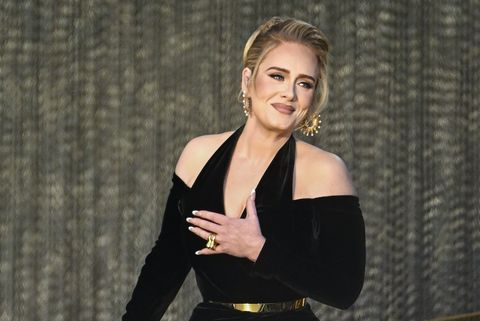

In [21]:
import cv2
from google.colab.patches import cv2_imshow

# Load the input image
image = cv2.imread("adele.jpg")

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to the image
gray = cv2.GaussianBlur(gray, (5, 5), 0)

# Detect edges in the image
edges = cv2.Canny(gray, 50, 150)

# Find contours in the image
contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Loop over the contours
for c in contours:
    # Approximate the contour
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.04 * peri, True)

    # If the contour has four vertices, it is a rectangle
    if len(approx) == 4:
        # Get the bounding box of the contour
        (x, y, w, h) = cv2.boundingRect(approx)

        # Filter out contours that are too small or too large
        if w > 50 and w < 150 and h > 50 and h < 150:
            # Draw a rectangle around the contour
            cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)

# Display the output
cv2_imshow(image)
cv2.waitKey()
cv2.destroyAllWindows()